In [186]:
using Pkg 

#Cascadia for searching and dealing with the html pages, 
#Gumbo for transforming the downloaded page into something Julia and Cascadia can deal with, and 
#HTTP to handle internet connections.
using HTTP, Gumbo, Cascadia

In [187]:
#Fetching the data from the url passed
imdb_top_250 = HTTP.get("https://www.imdb.com/chart/top/?ref_=nv_mv_250")

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Content-Type: text/html;charset=UTF-8
Transfer-Encoding: chunked
Connection: keep-alive
Server: Server
Date: Mon, 05 Oct 2020 08:49:23 GMT
x-amz-rid: 83EN8MT8BA88A25WESGX
Set-Cookie: uu=BCYuN1OmcY8gJ5dCviOuq0wrM9E5uiR-6lZdxE9BLJazdWckSIyE8iDp841Vo-xwx9i0HnQuVzC9%0D%0AB84IkKKpgzG0KJXh4O0_5yqVTj0bi22aHF5XchopqBe2vN_XFwJLZbDuhXk6LTTLxefii27fp91R%0D%0A4A%0D%0A; Domain=.imdb.com; Expires=Sat, 23-Oct-2088 12:03:30 GMT; Path=/; Secure
Set-Cookie: session-id=138-6019019-7750519; Domain=.imdb.com; Expires=Sat, 23-Oct-2088 12:03:30 GMT; Path=/; Secure
Set-Cookie: session-id-time=2232607763; Domain=.imdb.com; Expires=Sat, 23-Oct-2088 12:03:30 GMT; Path=/; Secure
X-Frame-Options: SAMEORIGIN
Content-Security-Policy: frame-ancestors 'self' imdb.com *.imdb.com *.media-imdb.com withoutabox.com *.withoutabox.com amazon.com *.amazon.com amazon.co.uk *.amazon.co.uk amazon.de *.amazon.de translate.google.com images.google.com www.google.com www.google.co.uk sear

In [188]:
# we are fetching the body of the response by parsing it using Gumbo
parsed_page = imdb_top_250.body |>
              String |>
              parsehtml

HTML Document:
<!DOCTYPE html>
HTMLElement{:HTML}:<HTML xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
  <head>
    <script type="text/javascript">var ue_t0=ue_t0||+new Date();    </script>
    <script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c

**Creating functions to fetch the data using selectors**

In [189]:
movie_name_sel = Selector(".titleColumn a") #selector for movies

#for each of the elements under titleColumn and imdb ratings
movie_names_all = eachmatch(movie_name_sel,parsed_page.root)

#creating a variable to store movie name
movie_name = String[]

#fetch all the movie names
for movie in movie_names_all
    name = strip(text(movie)) #get only the text part using strip()
    push!(movie_name, name)
end

In [190]:
movie_rating_sel = Selector(".imdbRating") #for ratings
movie_ratings_all = eachmatch(movie_rating_sel,parsed_page.root)

#creating a variable to store the ratings
movie_ratings = String[]

#fetch all the movie ratings
for movie in movie_ratings_all
    ratings = strip(text(movie)) #get only the text part using strip()
    push!(movie_ratings, ratings)
end

In [191]:
movie_year_sel = Selector(".secondaryInfo") #for years
movie_year_all = eachmatch(movie_year_sel,parsed_page.root)

#creating a variable to store the all the years
movie_years = String[]

#fetch all the years they were released in
for movie in movie_year_all
    years = strip(text(movie))        #get only the text part using strip()
    years = replace(years,"("  => "") #using replace function to remove brackets
    years = replace(years,")"  => "")
    push!(movie_years, years)
end

**We will now store the data obtained into the dataframe and use it to summarise**

In [192]:
using DataFrames
imdb_top_250 = DataFrame(Top_250_movie = movie_name,
                         Ratings = movie_ratings,
                         Years = movie_years)

#As the datatype of column is string, we will be transforming Ratings and Years to Integer and Float respectively
imdb_top_250[:Ratings] = parse.([Float16],imdb_top_250[:Ratings])
imdb_top_250[:Years] = parse.([Int],imdb_top_250[:Years])
head(imdb_top_250)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[192]:5
└ @ Core In[192]:5
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[192]:5
└ @ Core In[192]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[192]:7
└ @ Core In[192]:7
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[192]:7
└ @ Core In[192]:7
┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[192]:8
└ @ Core In[192]:8


,Top_250_movie,Ratings,Years
,String,Float16,Int64
1,The Shawshank Redemption,9.2,1994
2,The Godfather,9.1,1972
3,The Godfather: Part II,9.0,1974
4,The Dark Knight,9.0,2008
5,12 Angry Men,8.9,1957
6,Schindler's List,8.9,1993


In [193]:
#Grouping the data by ratings and obtaining count of total movies.
Ratings_count = combine(groupby(imdb_top_250, [:Ratings]), nrow => :count)

,Ratings,count
,Float16,Int64
1,9.2,1
2,9.1,1
3,9.0,2
4,8.9,3
5,8.8,5
6,8.7,3
7,8.6,10
8,8.5,23
9,8.4,22


In [194]:
using Plots

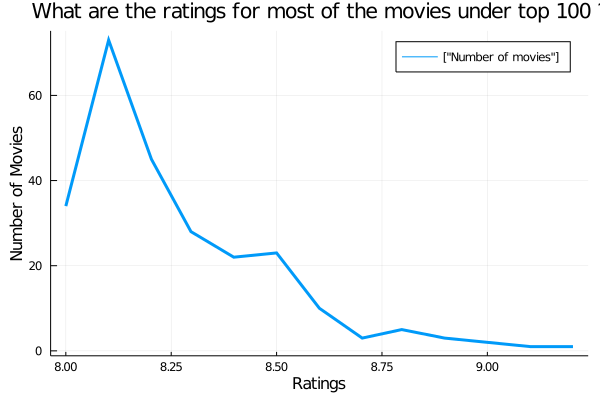

In [198]:
x = Ratings_count.Ratings; y = Ratings_count.count; # These are the plotting data
plot(x, y, title = "What are the ratings for most of the movies under top 100 ?",
     label = ["Number of movies"], lw =3)
     xlabel!("Ratings")
     ylabel!("Number of Movies")

#we can see from the plot that most of movies from Top 250 had ratings between 8 and 8.25
#while only few of them went above 9